# A typical data science task consists of 5 phases: 

1) Business understanding & problem framing
 
2) Exploratory data analysis & data cleaning
 
3) Feature engineering
 
4) Modeling and evaluation
 
5) Insights & Recommendations

## 1. Business understanding & problem framing

__PowerCo__ - a major gas and electricity utility that supplies to small and medium sized enterprises.
PowerCo are concerned about their customers leaving for better offers from other energy providers. 

__Hypothesis:__ Customers of PowerCo are more likely to churn (leave the service) if offered a lower price by a competitor, compared to customers who are not price sensitive.

## 2. Exploratory data analysis

**Understanding the business using data**

**client_data.csv**

* **ID:** This column uniquely identifies each client company within the dataset.
* **Activity_new:** This categorical variable specifies the category of business the client company operates in. 
* **Channel_sales:** This column contains a code representing the sales channel through which the client acquired service (e.g., phone sales, online signup).
* **Consumption Data:**
    * **cons_12m, cons_gas_12m:** These columns represent the client's electricity and gas consumption (respectively) over the past 12 months, measured in kilowatt-hours (kWh) or equivalent units. 
    * **cons_last_month:** This column represents the client's electricity consumption for the last month, measured in kWh.
* **Contract Dates:**
    * **date_activ:** This column indicates the date the client's contract with the company became active.
    * **date_end (if applicable):** This column stores the date the client's contract ended (if applicable). 
    * **date_renewal:** This column indicates the date of the client's next contract renewal.
* **Forecasting Data:**
    * **forecast_cons_12m, forecast_cons_year:** These columns represent forecasted electricity consumption for the client over the next 12 months and the next calendar year, respectively (measured in kWh).
    * **forecast_discount_energy:** This column represents the forecasted value of the current discount applied to the client's energy bill.
    * **forecast_meter_rent_12m:** This column represents the forecasted cost of meter rental for the client over the next 12 months.
    * **forecast_price_energy_off_peak, forecast_price_energy_peak:** These columns represent the forecasted energy prices for off-peak and peak periods, respectively.
    * **forecast_price_pow_off_peak, forecast_price_pow_mid_peak, forecast_price_pow_peak:** These columns represent the forecasted power prices for off-peak, mid-peak, and peak periods, respectively.
* **Client Attributes:**
    * **has_gas:** This binary variable indicates whether the client is also a gas customer (1) or not (0).
    * **imp_cons:** This column represents the client's current actual electricity consumption, likely measured in kWh.
    * **Margin Data:**
        * **margin_gross_pow_ele:** This column represents the gross margin earned by the company on the client's power subscription.
        * **margin_net_pow_ele:** This column represents the net margin earned by the company on the client's power subscription after accounting for costs.
    * **nb_prod_act:** This column represents the number of active products and services the client has subscribed to.
    * **net_margin:** This column represents the total net margin earned by the company from the client.
    * **num_years_antig:** This column represents the number of years the client has been a customer.
* **Origin_up:** This column contains a code representing the specific marketing campaign that led the client to subscribe to the service initially.
* **Pow_max:** This column represents the maximum subscribed power capacity for the client's electricity service, likely measured in kilowatts (kW).
* **Churn:** This binary variable indicates whether the client churned (stopped using the service) within the next 3 months (1) or not (0). This is the target variable we're trying to predict.


**price_data.csv**

* **ID:** This column uniquely identifies each client company within the dataset, allowing us to link it with the client data in the other file. 
* **Price_date:** This column represents the date for which the price data applies.
* **Price Variation Data:**
    * **price_off_peak_var, price_peak_var, price_mid_peak_var:** These columns represent the variable component of the energy price for off-peak, peak, and mid-peak periods, respectively. 
* **Price Fixed Data:**
    * **price_off_peak_fix, price_peak_fix, price_mid_peak_fix:** These columns represent the fixed component of the power price for off-peak, peak, and mid-peak periods, respectively. 

### 1. Import packages

In [111]:
import warnings
warnings.filterwarnings("ignore")

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
# sns.set(color_codes=True)

### 2. Loading data with Pandas


In [113]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [114]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,0


In [115]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000



### 3. Descriptive statistics of data

Understading the datasets

#### Understading datatypes of columns

In [116]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [117]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Columns containing dates are in object datatype, we need to convert them later

#### Statistics


In [118]:
pd.set_option('display.max_columns', 50)

In [119]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [120]:
client_df.describe(include='all')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,14606.00000,14606.00000,14606.00000,14606,14606,14606,14606,14606.00000,14606.00000,14606.00000,14606.00000,14606.00000,14606.00000,14606.00000,14606,14606.00000,14606.00000,14606.00000,14606.00000,14606.00000,14606.00000,14606,14606.00000,14606.00000
unique,14606,8,NaN,NaN,NaN,1796,368,2129,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,2009-08-01,2016-02-01,2015-11-01,2015-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,6754,NaN,NaN,NaN,95,145,721,587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11955,NaN,NaN,NaN,NaN,NaN,NaN,7097,NaN,NaN
mean,NaN,NaN,159220.28625,28092.37533,16090.26975,NaN,NaN,NaN,NaN,1868.61488,1399.76291,0.96673,63.08687,0.13728,0.05049,43.13006,NaN,152.78690,24.56512,24.56252,1.29235,189.26452,4.99781,NaN,18.13514,0.09715
std,NaN,NaN,573465.26420,162973.05906,64364.19642,NaN,NaN,NaN,NaN,2387.57153,3247.78626,5.10829,66.16578,0.02462,0.04904,4.48599,NaN,341.36937,20.23117,20.23028,0.70977,311.79813,1.61175,NaN,13.53474,0.29617
min,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,NaN,3.30000,0.00000
25%,NaN,NaN,5674.75000,0.00000,0.00000,NaN,NaN,NaN,NaN,494.99500,0.00000,0.00000,16.18000,0.11634,0.00000,40.60670,NaN,0.00000,14.28000,14.28000,1.00000,50.71250,4.00000,NaN,12.50000,0.00000
50%,NaN,NaN,14115.50000,0.00000,792.50000,NaN,NaN,NaN,NaN,1112.87500,314.00000,0.00000,18.79500,0.14317,0.08414,44.31138,NaN,37.39500,21.64000,21.64000,1.00000,112.53000,5.00000,NaN,13.85600,0.00000
75%,NaN,NaN,40763.75000,0.00000,3383.00000,NaN,NaN,NaN,NaN,2401.79000,1745.75000,0.00000,131.03000,0.14635,0.09884,44.31138,NaN,193.98000,29.88000,29.88000,1.00000,243.09750,6.00000,NaN,19.17250,0.00000


We can see that the columns are heavily skewed. By plotting the distribution of dates we might find some seasonal trends which can be useful for predicting churn. And by plotting  __channel_sales__ and __origin_up__ against __churn__ we might find sources of maximum or minimum churn. 

In [121]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.00000,193002.00000,193002.00000,193002.00000,193002.00000,193002.00000
mean,0.14103,0.05463,0.03050,43.33448,10.62288,6.40998
std,0.02503,0.04992,0.03630,5.41030,12.84189,7.77359
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.12598,0.00000,0.00000,40.72888,0.00000,0.00000
50%,0.14603,0.08548,0.00000,44.26693,0.00000,0.00000
75%,0.15163,0.10167,0.07256,44.44471,24.33958,16.22639
max,0.28070,0.22979,0.11410,59.44471,36.49069,17.45822


### 4. Data visualization

In [122]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right", 
                           pad=0.99, colour="white", textsize=13, legend_placeholders=["Retention", "Churn"], ylabel="Company base (%)"):
  """
  Plots a stacked bar graph with annotations on the bars.

  Args:
      dataframe: Pandas dataframe containing the data to be plotted.
      title_: Title for the plot.
      size_: Size of the figure (width, height).
      rot_: Rotation of x-axis labels in degrees.
      legend_: Location of the legend (e.g., "upper right", "lower left").
      pad: Padding for bar annotation placement (default: 0.99).
      colour: Color of the annotation text (default: "white").
      textsize: Font size for the annotation text (default: 13).
      legend_placeholders: Values of legends to plot
      ylabel: label for y-axis
  """
  fig, ax = plt.subplots(figsize=size_)
  dataframe.plot(kind="bar", stacked=True, rot=rot_, title=title_, ax=ax)

  # Annotate bars
  for p in ax.patches:
    value = str(round(p.get_height(), 1))
    if value == '0.0':
      continue
    ax.annotate(value, ((p.get_x() + p.get_width() / 2) * pad - 0.05, (p.get_y() + p.get_height() / 2) * pad),
                color=colour, size=textsize)

  # Rename legend
  plt.legend(legend_placeholders, loc=legend_)
  # Labels
  plt.ylabel(ylabel)
  plt.show()


In [123]:
def plot_distribution(dataframe, column, ax, bins_=15):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

#### Finding churn rate

In [124]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(['churn']).count()
# print(churn_total)
churn_percentage = churn_total / churn_total.sum() * 100
print(churn_percentage)

       Companies
churn           
0       90.28481
1        9.71519


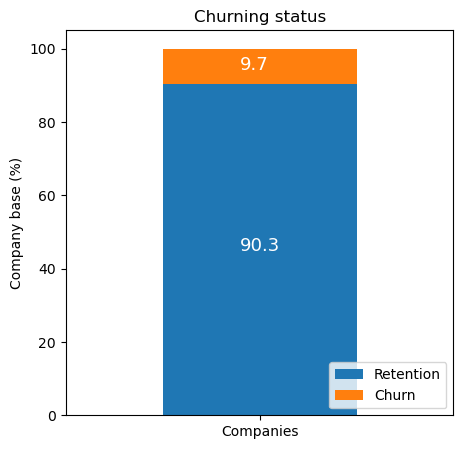

In [125]:
plot_stacked_bars(churn_percentage.T, "Churning status", (5, 5), legend_="lower right")

Churn rate is nearly 10% 

#### Finding churn rate against channel_sales

In [126]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

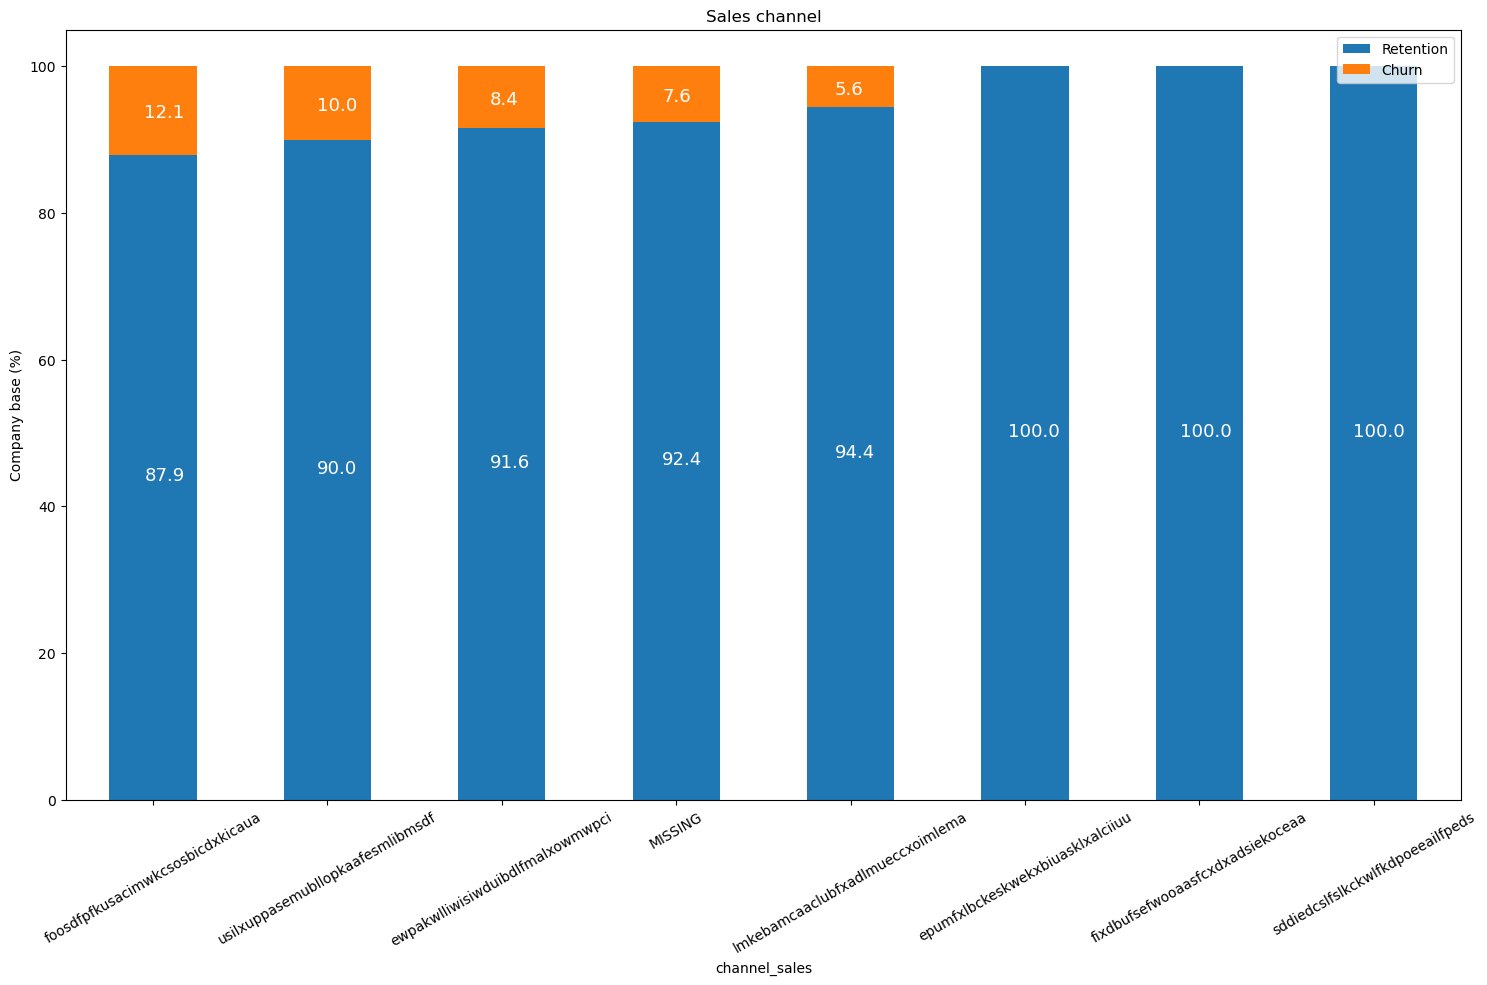

In [127]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

#### Finding churn rate against origin_up

In [128]:
origin = client_df[['id', 'origin_up', 'churn']]
origin = origin.groupby([origin['origin_up'], origin['churn']])['id'].count().unstack(level=1).fillna(0)
origin_churn = (origin.div(origin.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

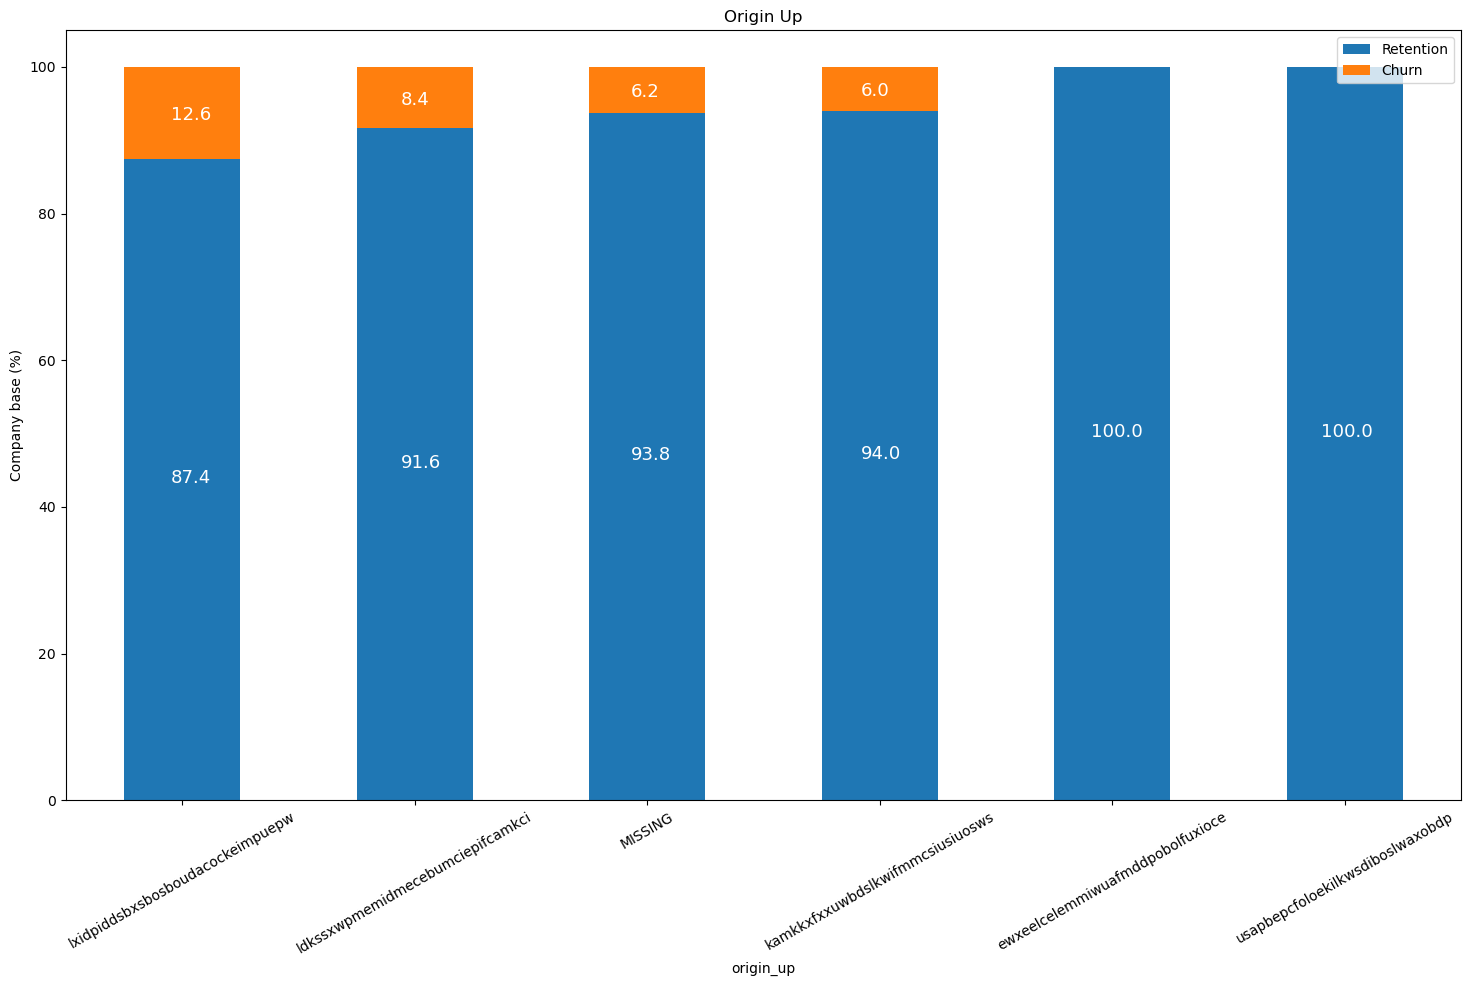

In [129]:
plot_stacked_bars(origin_churn, 'Origin Up', rot_=30)

#### Finding churn rate against has_gas

In [130]:
gas = client_df[['id', 'has_gas', 'churn']]
gas = gas.groupby([gas['has_gas'], gas['churn']])['id'].count().unstack(level=1).fillna(0)
gas_churn = (gas.div(gas.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

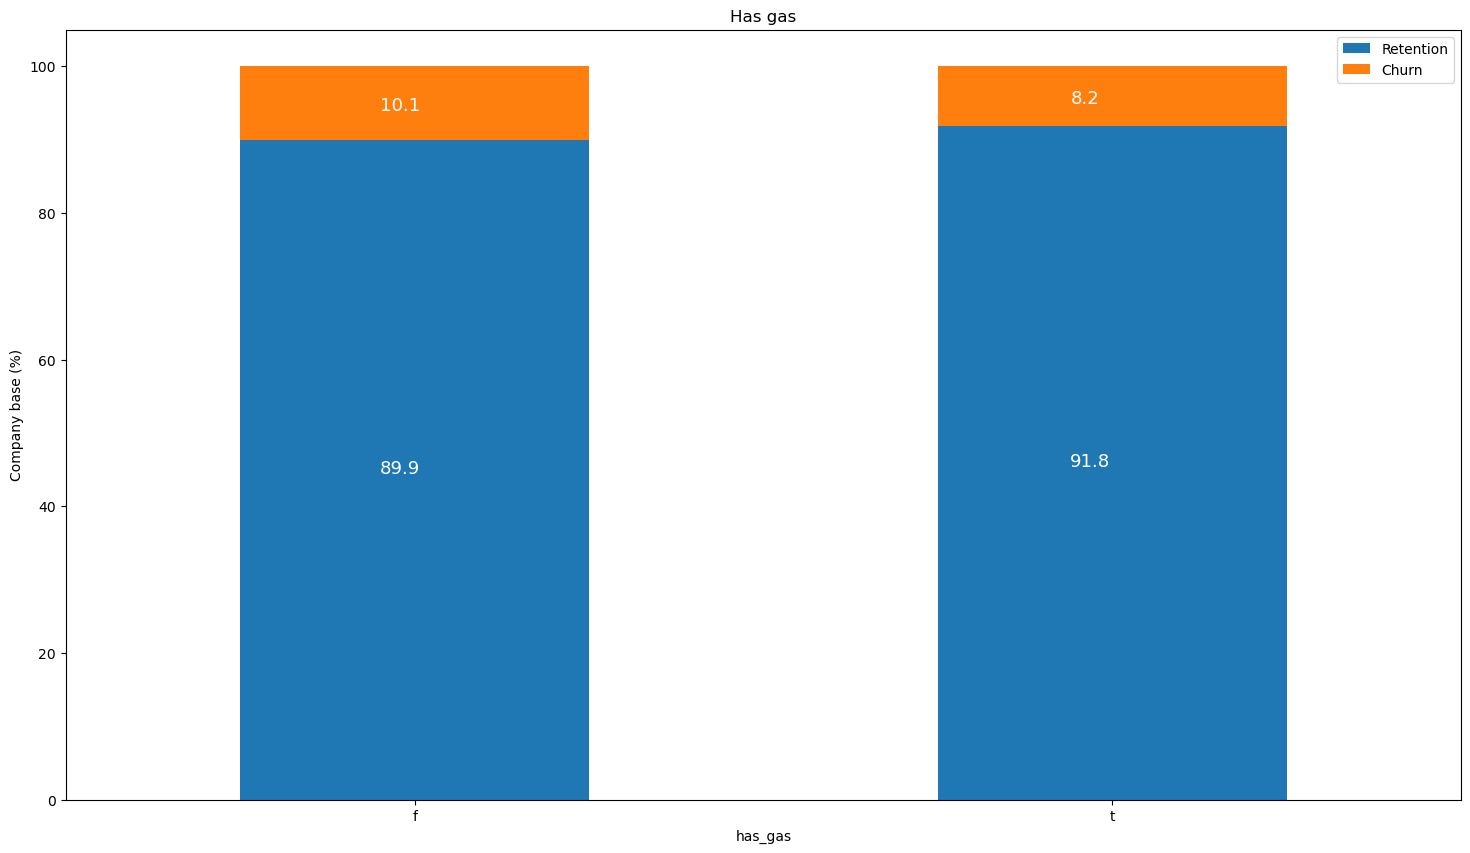

In [131]:
plot_stacked_bars(gas_churn, 'Has gas')

Having a gas connection does not impact the churn much

#### Finding churn rate against nb_prod_act

In [132]:
prod_act = client_df[['id', 'nb_prod_act', 'churn']]
prod_act = prod_act.groupby([prod_act['nb_prod_act'], prod_act['churn']])['id'].count().unstack(level=1).fillna(0)
prod_act_churn = (prod_act.div(prod_act.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

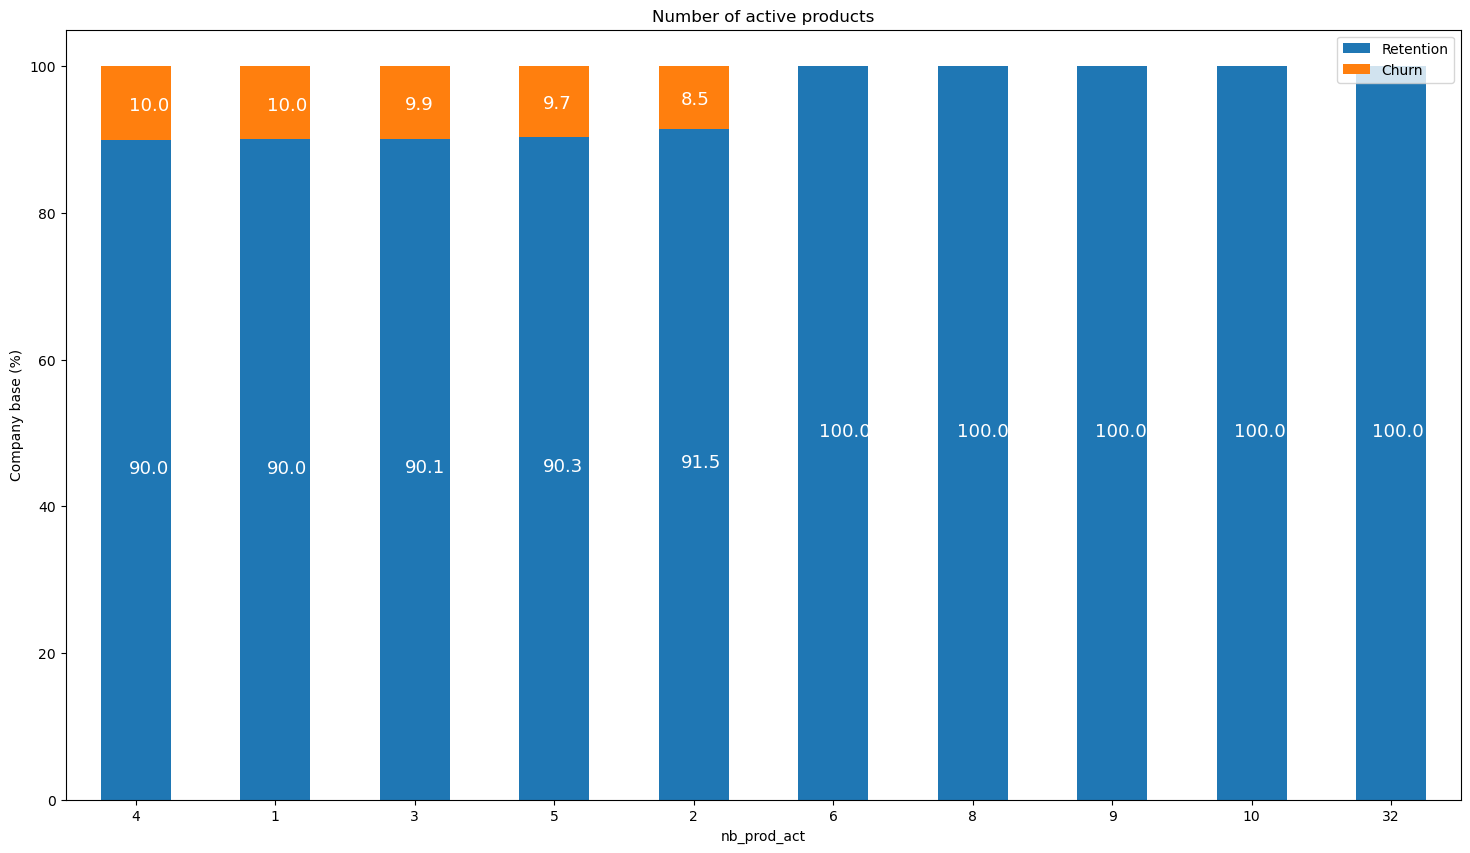

In [133]:
plot_stacked_bars(prod_act_churn, 'Number of active products')

Interestingly we can see that increase in number of active products churn rate decreases

#### Finding churn rate against nb_prod_act

In [134]:
years_antig = client_df[['id', 'num_years_antig', 'churn']]
years_antig = years_antig.groupby([years_antig['num_years_antig'], years_antig['churn']])['id'].count().unstack(level=1).fillna(0)
years_antig_churn = (years_antig.div(years_antig.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

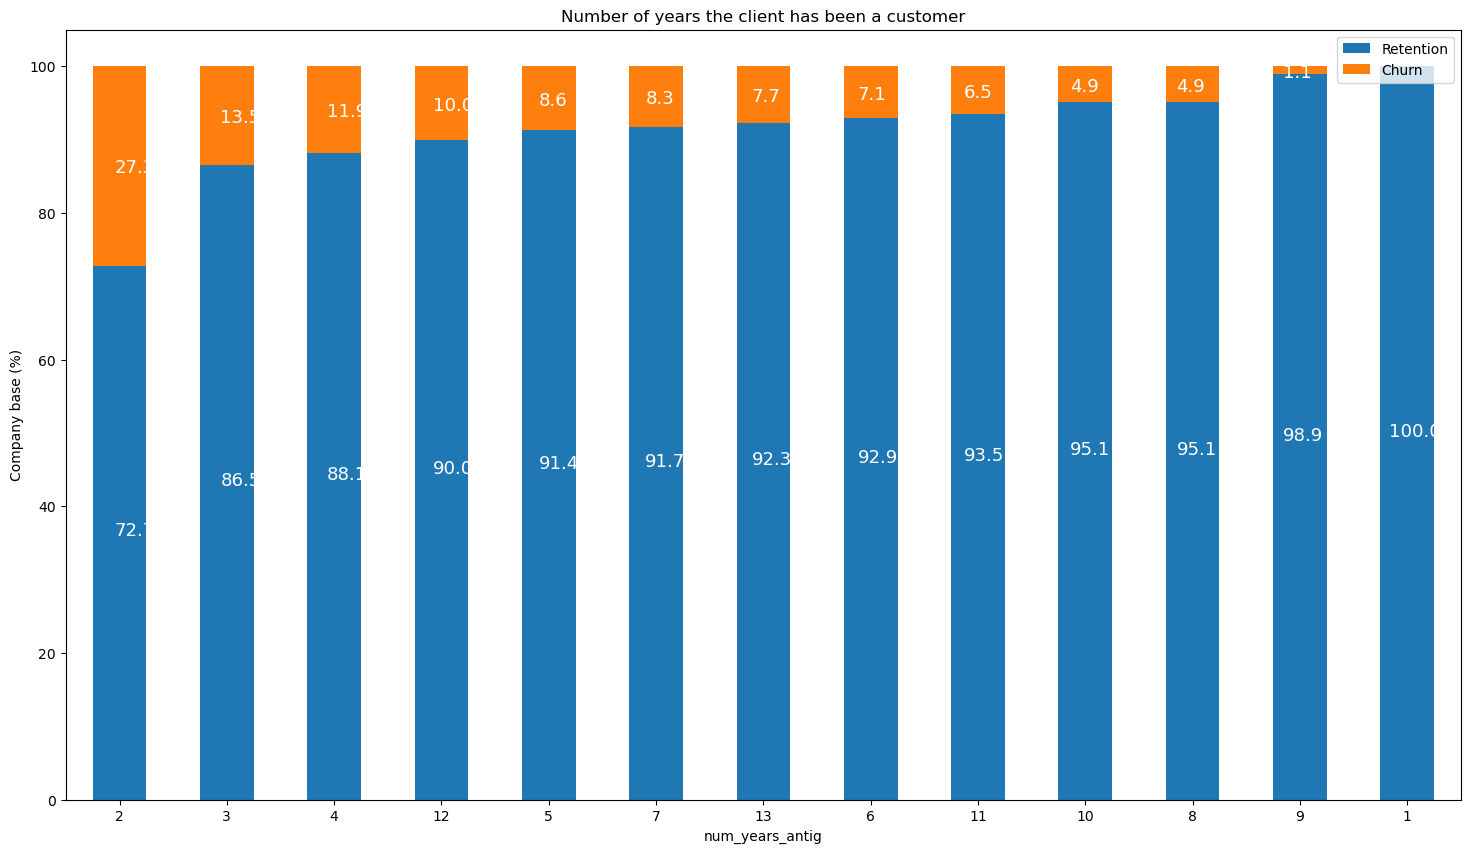

In [135]:
plot_stacked_bars(years_antig_churn, 'Number of years the client has been a customer')

As we can see that the customers of beginning stage and last stage are most likely to leave

#### Finding churn rate against numerical features

In [136]:
numeric_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'pow_max']
numeric_df = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'pow_max', 'churn']]

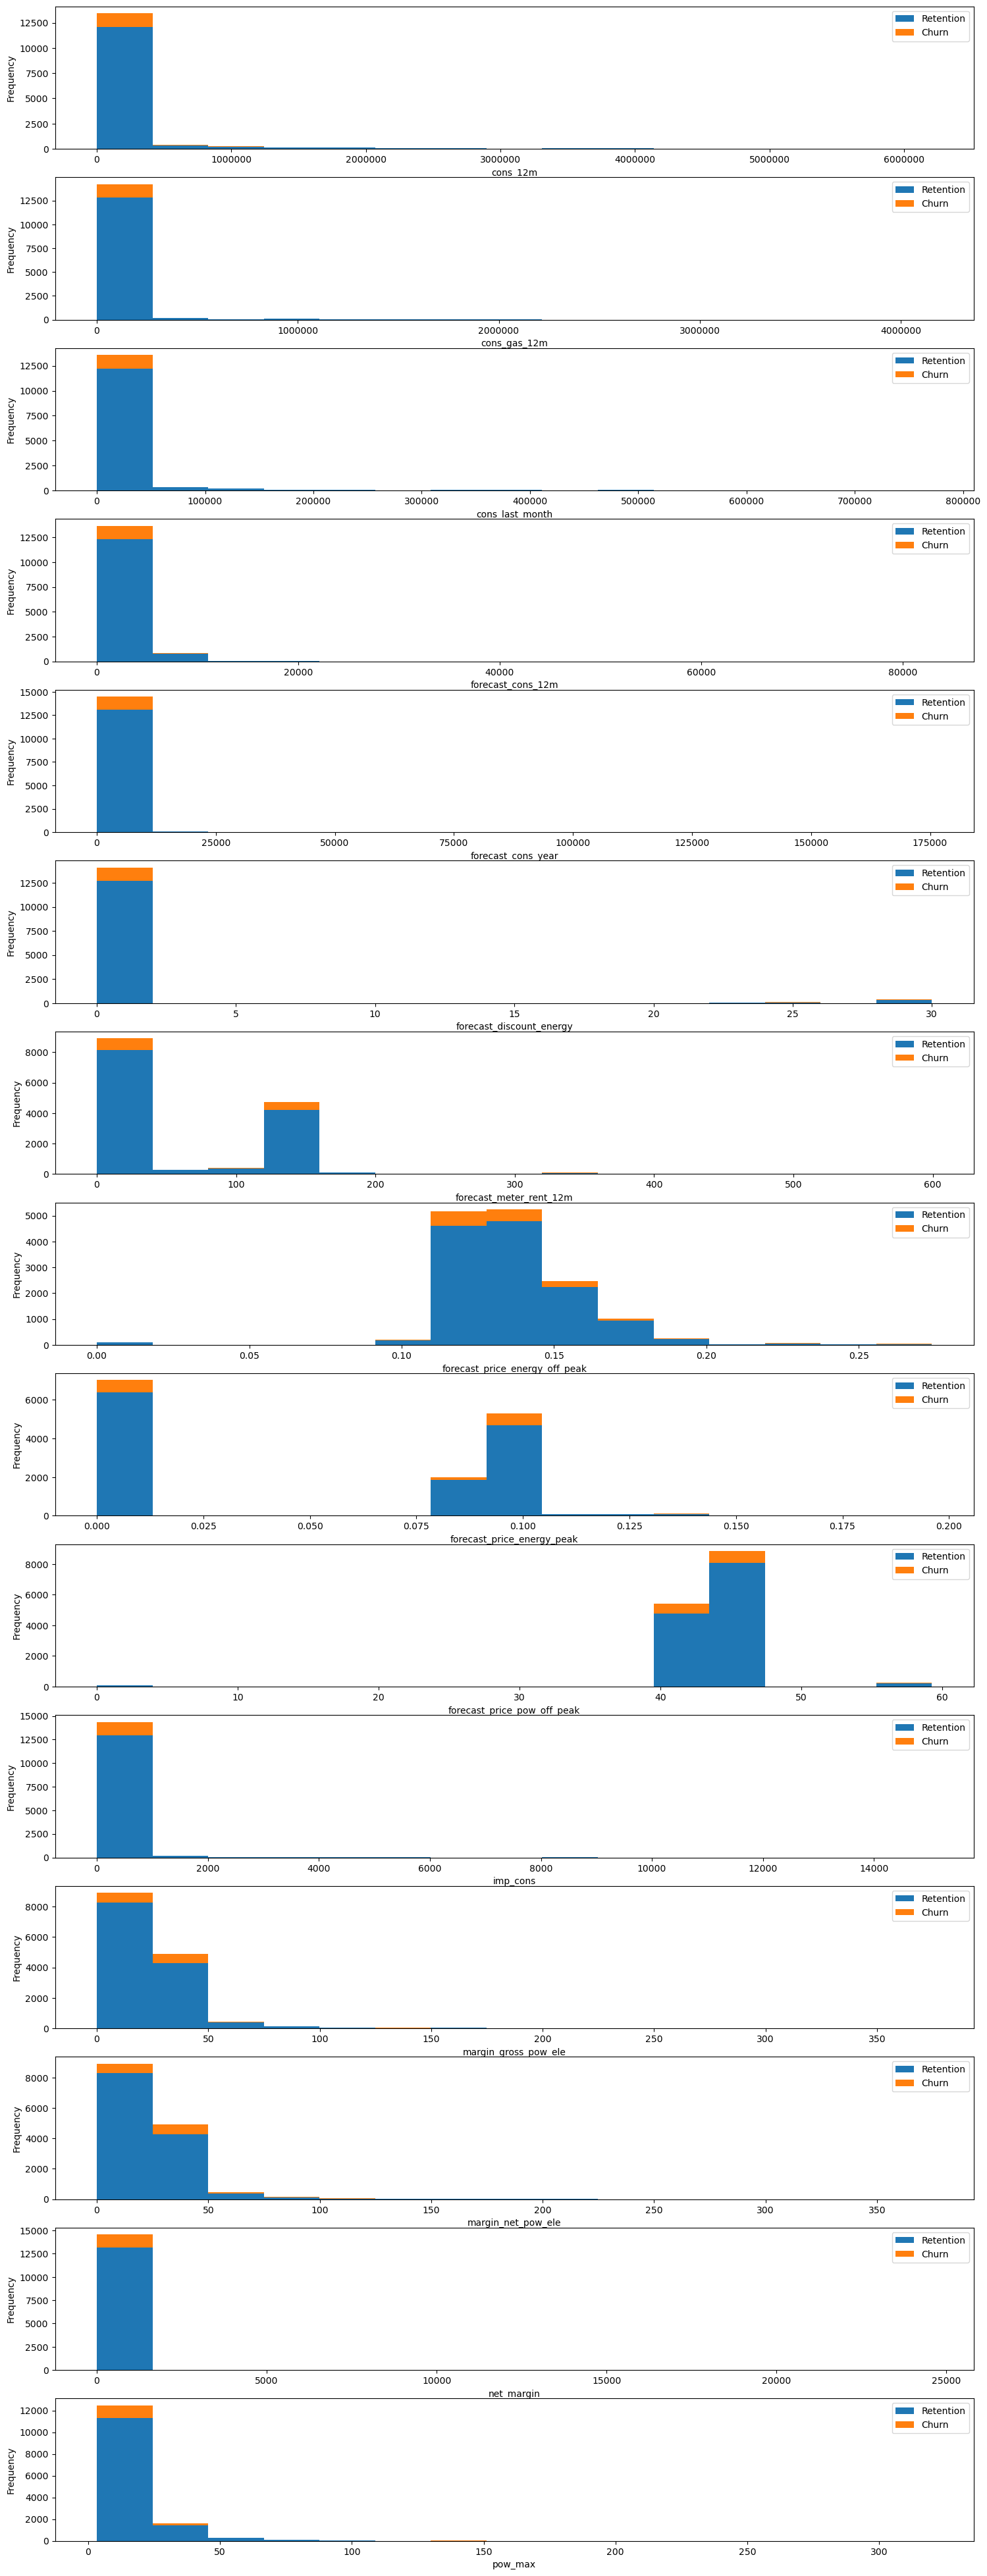

In [137]:
fig, axs = plt.subplots(nrows=15, figsize=(18, 50))
for column in numeric_features:
    plot_distribution(numeric_df, column, axs[numeric_features.index(column)])

#### Graphical representation of numerical Columns

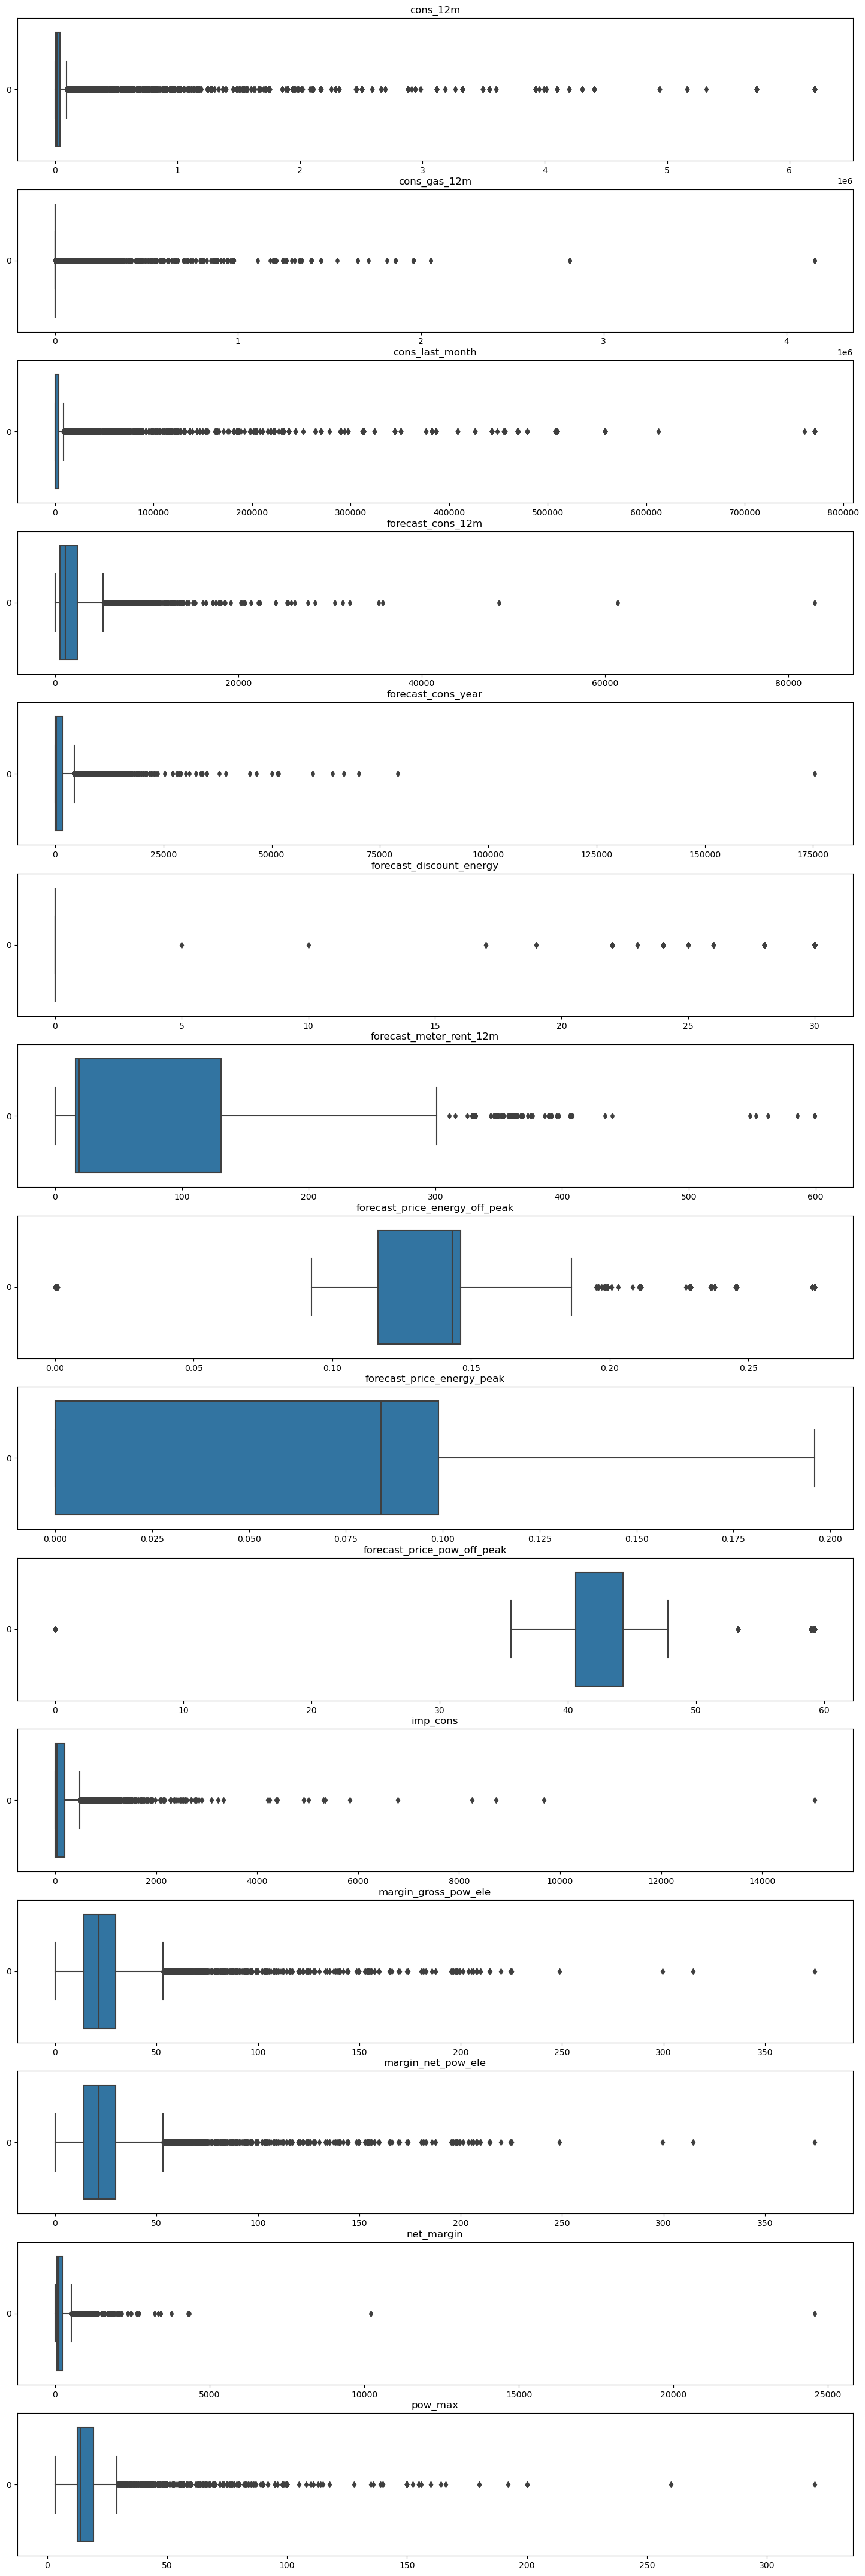

In [138]:
fig, axs = plt.subplots(nrows=15, figsize=(18, 55))
for column in numeric_features:
    sns.boxplot(client_df[column], ax=axs[numeric_features.index(column)], orient='h')
    axs[numeric_features.index(column)].set_title(column)

## 3. Feature Engineering and Data Preprocessing

### Feature Engineering

Load cleaned data

In [139]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [140]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,22.02254,1.10285,49.55073,22.02298,0.00013,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,0.00000,0.00647,0.00061,0.00000,0.00000,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,0.00000,0.00767,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [141]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.14963,0.00000,0.00000,44.26693,0.00000,0.00000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.14963,0.00000,0.00000,44.26693,0.00000,0.00000


In [142]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.15137,0.00000,0.00000,44.26693,0.00000,0.00000


#### 1. Using existing columns to create new features

##### Difference between off-peak prices in December and preceding January

In [143]:
price_off_peak_var_and_fix = price_df[['id','price_date','price_off_peak_var','price_off_peak_fix']]

# Get january and december prices
jan_prices = price_off_peak_var_and_fix.groupby('id').first().reset_index()
dec_prices = price_off_peak_var_and_fix.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_var', 'price_off_peak_fix': 'dec_fix'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_jan_energy'] = diff['dec_var'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_jan_power'] = diff['dec_fix'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_jan_energy','offpeak_diff_dec_jan_power']]
diff.head()

,id,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.00619,0.16292
1,0004351ebdd665e6ee664792efc4fd13,-0.00410,0.17778
2,0010bcc39e42b3c2131ed2ce55246e3c,0.05044,1.50000
3,0010ee3855fdea87602a5b7aba8e42de,-0.01002,0.16292
4,00114d74e963e47177db89bc70108537,-0.00399,-0.00000


In [144]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,22.02254,1.10285,49.55073,22.02298,0.00013,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,0.00000,0.00647,0.00061,0.00000,0.00000,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,0.00000,0.00767,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04000,0,0.00000,19.83000,0.14669,0.00000,44.31138,f,0.00000,30.22000,30.22000,1,25.46000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20000,0.00001,0.00000,0.00000,0.00646,0.00000,0.00000,0.00647,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00455,0.17778
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75000,526,0.00000,131.73000,0.11690,0.10001,40.60670,f,52.32000,44.91000,44.91000,1,47.98000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80000,0.00001,0.00000,0.00000,0.00543,0.00195,0.00087,0.00544,0.00196,0.00087,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0,-0.00619,0.16292


Difference betweeen the january and december prices gives overall price volatility and might be useful for predicting churn

##### Extracting months from __date_activ__ and __date_end__

In [145]:
df['month_date_activ'] = df['date_activ'].dt.month
df['month_date_end'] = df['date_end'].dt.month
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,month_date_activ,month_date_end
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,22.02254,1.10285,49.55073,22.02298,0.00013,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096,6,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,0.00000,0.00647,0.00061,0.00000,0.00000,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778,8,8
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,0.00000,0.00767,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778,4,4
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04000,0,0.00000,19.83000,0.14669,0.00000,44.31138,f,0.00000,30.22000,30.22000,1,25.46000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20000,0.00001,0.00000,0.00000,0.00646,0.00000,0.00000,0.00647,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00455,0.17778,3,3
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75000,526,0.00000,131.73000,0.11690,0.10001,40.60670,f,52.32000,44.91000,44.91000,1,47.98000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80000,0.00001,0.00000,0.00000,0.00543,0.00195,0.00087,0.00544,0.00196,0.00087,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0,-0.00619,0.16292,1,3


Finding the month in which client has joined or left the PowerCo could be useful feature for predicting churn.

#### 2. Combining some columns together to create new columns

##### Average price changes across periods


In [146]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [147]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [148]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,...,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,month_date_activ,month_date_end,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,...,49.55070,22.02254,1.10285,49.55073,22.02298,0.00013,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096,6,6,0.02404,0.03422,0.05826,18.59026,7.45067,26.04093
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,...,0.00000,0.00000,0.00647,0.00061,0.00000,0.00000,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778,8,8,0.14249,0.00712,0.14961,44.31138,0.00000,44.31138
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,...,0.00000,0.00000,0.00767,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778,4,4,0.08209,0.08842,0.17051,44.38545,0.00000,44.38545
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04000,0,0.00000,19.83000,0.14669,0.00000,44.31138,f,0.00000,30.22000,30.22000,1,25.46000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20000,...,0.00000,0.00000,0.00647,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00455,0.17778,3,3,0.15121,0.00000,0.15121,44.40027,0.00000,44.40027
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75000,526,0.00000,131.73000,0.11690,0.10001,40.60670,f,52.32000,44.91000,44.91000,1,47.98000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80000,...,0.00195,0.00087,0.00544,0.00196,0.00087,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0,-0.00619,0.16292,1,3,0.02054,0.03077,0.05131,16.27526,8.13763,24.41289


While the difference between January and December prices provides a general trend, analyzing price differences across smaller time periods reveals more granular details.

##### Finding how long a company has been a client of PowerCo

In [149]:
df['tenure'] = (df['date_end'] - df['date_activ']).dt.days
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,...,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,month_date_activ,month_date_end,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,t,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,...,22.02254,1.10285,49.55073,22.02298,0.00013,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096,6,6,0.02404,0.03422,0.05826,18.59026,7.45067,26.04093,1096
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,f,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,...,0.00000,0.00647,0.00061,0.00000,0.00000,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778,8,8,0.14249,0.00712,0.14961,44.31138,0.00000,44.31138,2566
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,f,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,...,0.00000,0.00767,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778,4,4,0.08209,0.08842,0.17051,44.38545,0.00000,44.38545,2192


Finding client's tenure might be a useful feature for predicting churn as we have seen in the EDA part

#### 3. Removing unnecessary features

In [150]:
df = df.drop(columns=[
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
])

Datetime features themself does not hold any value. So we are removing them.

##### Using Correlation

In [151]:
corr_matrix = numeric_df.drop('churn', axis=1).corr()

<Axes: >

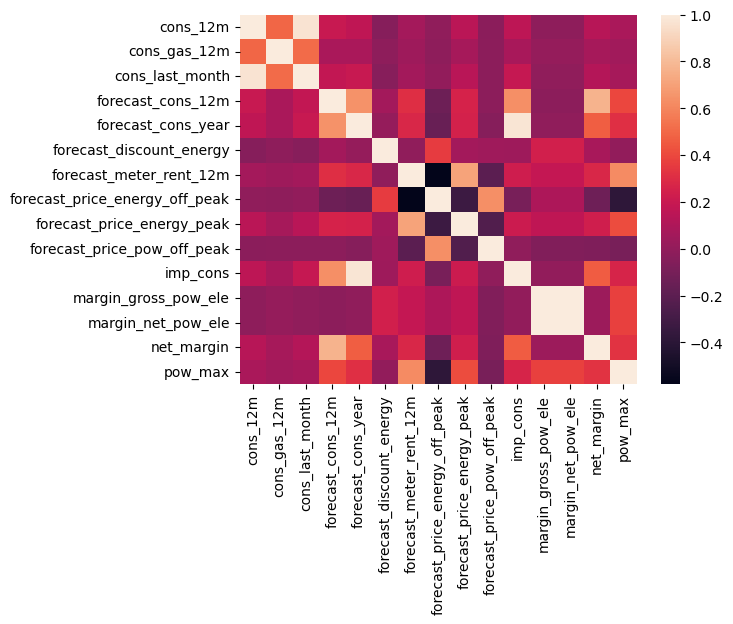

In [152]:
sns.heatmap(corr_matrix)

As the model assumes features to be independent and normal, we can remove columns which shows high correlation with other columns. High correlation indicates features share similar information.

### Data Preprocessing

#### Transforming __has_gas__ feature into binary flag

In [153]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])

#### Encoding categorical variables using One-Hot-Enconding

##### Encoding __channel_sales__ feature

In [154]:
# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

As the last three categories of __channel_sales__ does not have enough values when compared to actual data size, most of the fields in the features remains zero which is not useful for predictions. So, we dropping the last three encoded features.

In [155]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel', dtype='int')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,...,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,month_date_activ,month_date_end,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,tenure,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,1,0.00000,25.44000,25.44000,2,678.99000,3,lxidpiddsbxsbosboudacockeimpuepw,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,...,0.00004,0.00091,2.08629,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096,6,6,0.02404,0.03422,0.05826,18.59026,7.45067,26.04093,1096,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,0,0.00000,16.38000,16.38000,1,18.89000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,...,0.00122,0.00000,0.00948,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778,8,8,0.14249,0.00712,0.14961,44.31138,0.00000,44.31138,2566,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,0,0.00000,28.60000,28.60000,1,6.60000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778,4,4,0.08209,0.08842,0.17051,44.38545,0.00000,44.38545,2192,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04000,0,0.00000,19.83000,0.14669,0.00000,44.31138,0,0.00000,30.22000,30.22000,1,25.46000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20000,0.00001,0.00000,0.00000,0.00646,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00455,0.17778,3,3,0.15121,0.00000,0.15121,44.40027,0.00000,44.40027,2192,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75000,526,0.00000,131.73000,0.11690,0.10001,40.60670,0,52.32000,44.91000,44.91000,1,47.98000,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80000,0.00001,0.00000,0.00000,0.00543,0.00195,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0,-0.00619,0.16292,1,3,0.02054,0.03077,0.05131,16.27526,8.13763,24.41289,2245,1,0,0,0,0


##### Encoding __origin_up__ feature

In [156]:
# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Same as above we are dropping the last 3 encoded features

In [157]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin', dtype='int')
df = df.drop(columns=['origin_MISSING', 'origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,month_date_activ,month_date_end,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,tenure,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00000,0,0.00000,1.78000,0.11448,0.09814,40.60670,1,0.00000,25.44000,25.44000,2,678.99000,3,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,22.02254,...,99.53052,44.23579,2.08643,99.53056,44.23670,1,0.02006,3.70096,6,6,0.02404,0.03422,0.05826,18.59026,7.45067,26.04093,1096,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95000,0,0.00000,16.27000,0.14571,0.00000,44.31138,0,0.00000,16.38000,16.38000,1,18.89000,6,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,0.00000,...,0.00000,0.00000,0.00949,0.00122,0.00000,0,-0.00377,0.17778,8,8,0.14249,0.00712,0.14961,44.31138,0.00000,44.31138,2566,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96000,0,0.00000,38.72000,0.16579,0.08790,44.31138,0,0.00000,28.60000,28.60000,1,6.60000,6,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00467,0.17778,4,4,0.08209,0.08842,0.17051,44.38545,0.00000,44.38545,2192,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04000,0,0.00000,19.83000,0.14669,0.00000,44.31138,0,0.00000,30.22000,30.22000,1,25.46000,6,13.20000,0.00001,0.00000,0.00000,0.00646,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,-0.00455,0.17778,3,3,0.15121,0.00000,0.15121,44.40027,0.00000,44.40027,2192,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75000,526,0.00000,131.73000,0.11690,0.10001,40.60670,0,52.32000,44.91000,44.91000,1,47.98000,6,19.80000,0.00001,0.00000,0.00000,0.00543,0.00195,0.00087,...,0.00000,0.00000,0.00001,0.00000,0.00000,0,-0.00619,0.16292,1,3,0.02054,0.03077,0.05131,16.27526,8.13763,24.41289,2245,1,0,0,0,0,1,0,0


#### Handling skewness in numeric features

In [158]:
numeric_columns = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

cons_12m 	 5.997308122068939
cons_gas_12m 	 9.59752998980867
cons_last_month 	 6.391406974903164
forecast_cons_12m 	 7.155852615615487
forecast_cons_year 	 16.587989682280156
forecast_discount_energy 	 5.155098289065647
forecast_meter_rent_12m 	 1.5051478520584571
forecast_price_energy_off_peak 	 -0.11958602474988272
forecast_price_energy_peak 	 -0.014331427861824115
forecast_price_pow_off_peak 	 -4.998771993850156


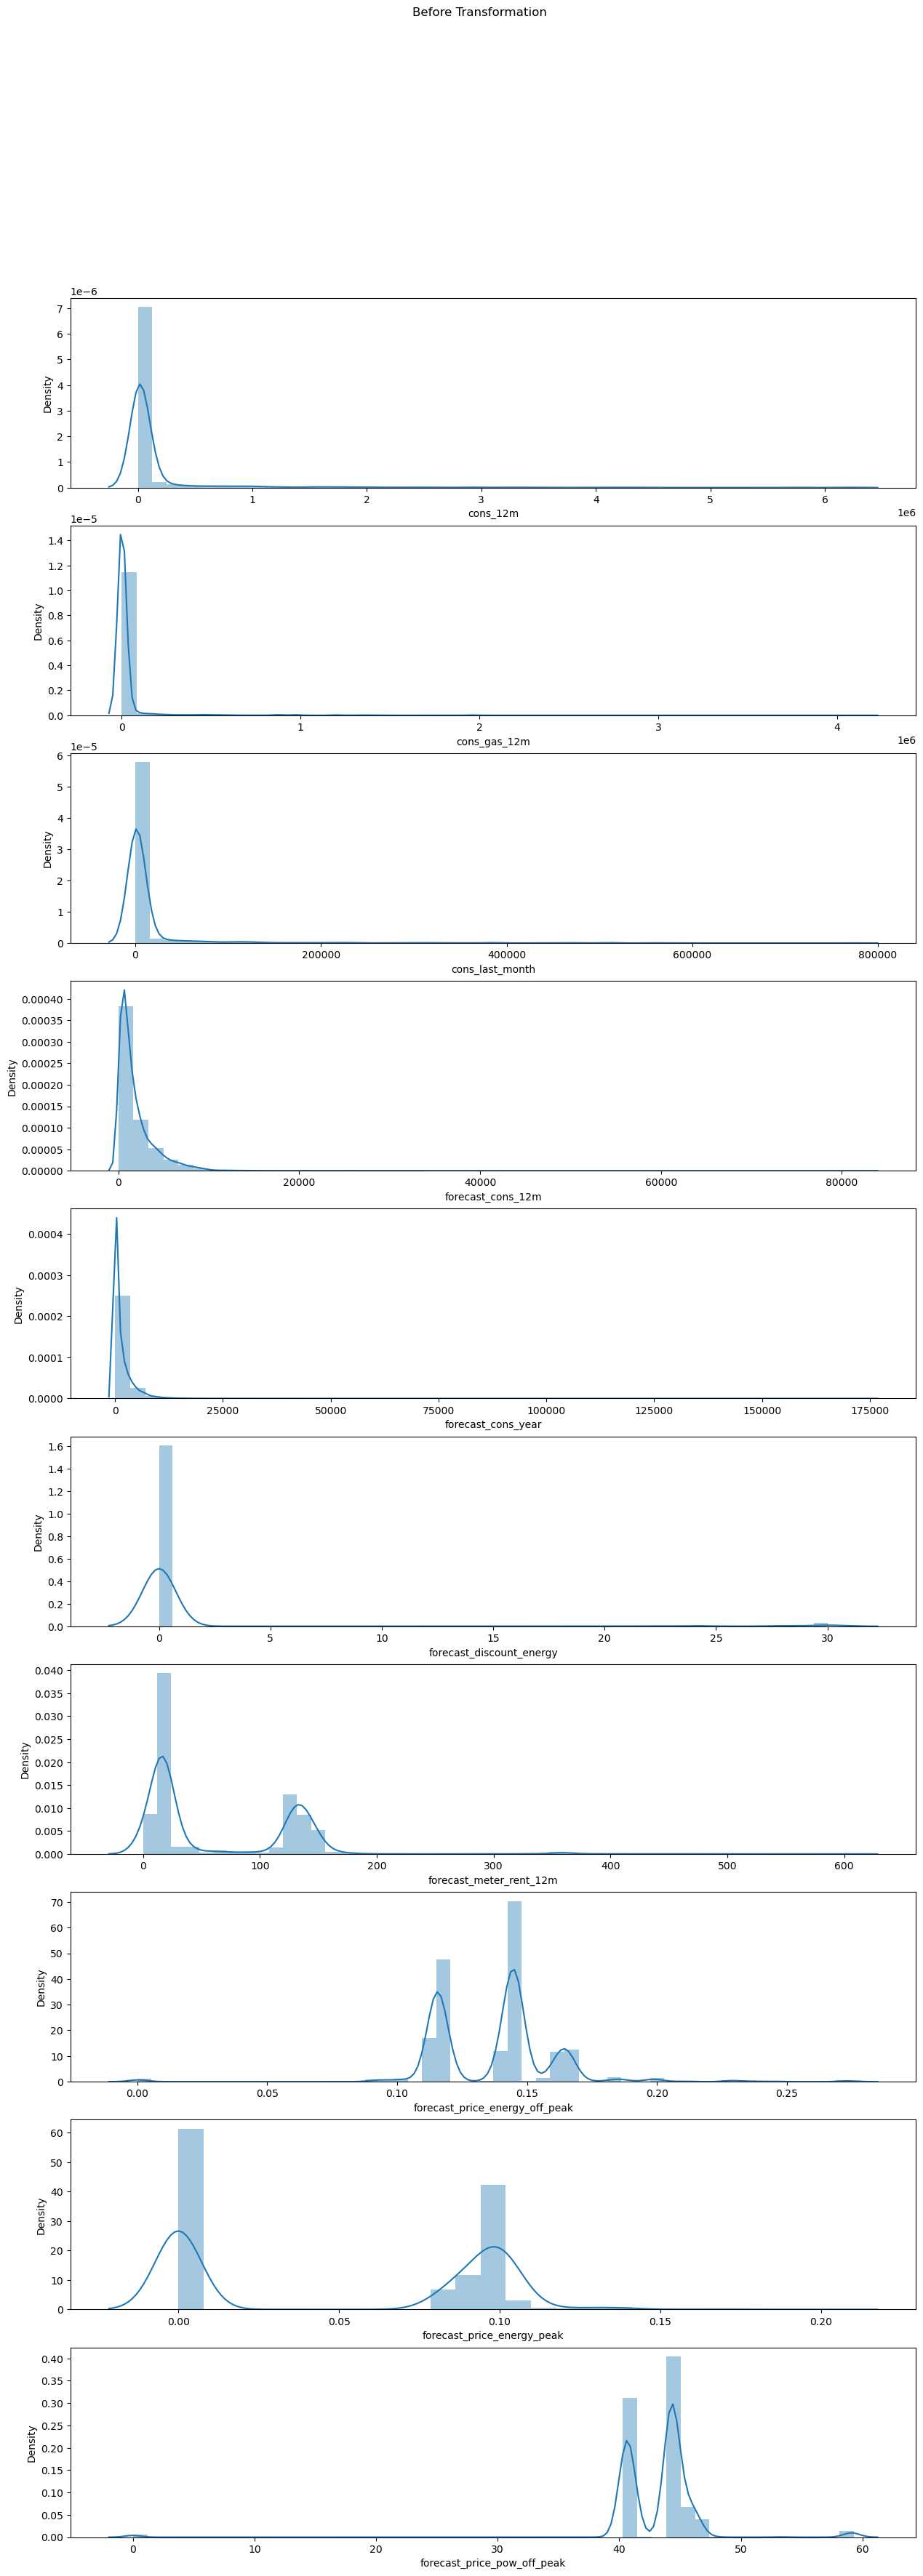

In [159]:
# Finding skewness values and visualising distributions for different numeric features
fig, axs = plt.subplots(nrows=10, figsize=(15, 40))

plt.suptitle('Before Transformation')
for i, column in enumerate(numeric_columns):
    sns.distplot((df[column].dropna()), ax=axs[i])
    print(column,'\t',df[column].skew()) 


As you can see first 7 columns are positively skewed and other 3 negatively skewed. We have different methods to handle positive and negative skewness like log transformation, square root transformation, etc.,

In [160]:
# from scipy.stats import boxcox

In [161]:
# def handle_skewness_boxcox(data):
#   try:
#     lambda_, _ = boxcox(data)
#     return np.power(data, lambda_) if lambda_ != 0 else np.log(data + 1)  # Handle lambda = 0 case
#   except:
#     print("Warning: Box-Cox transformation failed, using original data for", data.name)
#     return data

In [162]:
# temp = temp.apply(handle_skewness_boxcox)

In [163]:
# Applying log transformation
for column in numeric_columns:
    df[column] = np.log10(df[column] + 1)

cons_12m 	 -0.37954079901387705
cons_gas_12m 	 1.8757249574656631
cons_last_month 	 -0.19069689408438098
forecast_cons_12m 	 -2.0327515916178744
forecast_cons_year 	 -0.11864865052965691
forecast_discount_energy 	 5.069117878016629
forecast_meter_rent_12m 	 -0.6036375456526835
forecast_price_energy_off_peak 	 -0.46644313286227596
forecast_price_energy_peak 	 -0.02137829632583564
forecast_price_pow_off_peak 	 -11.630457068079624


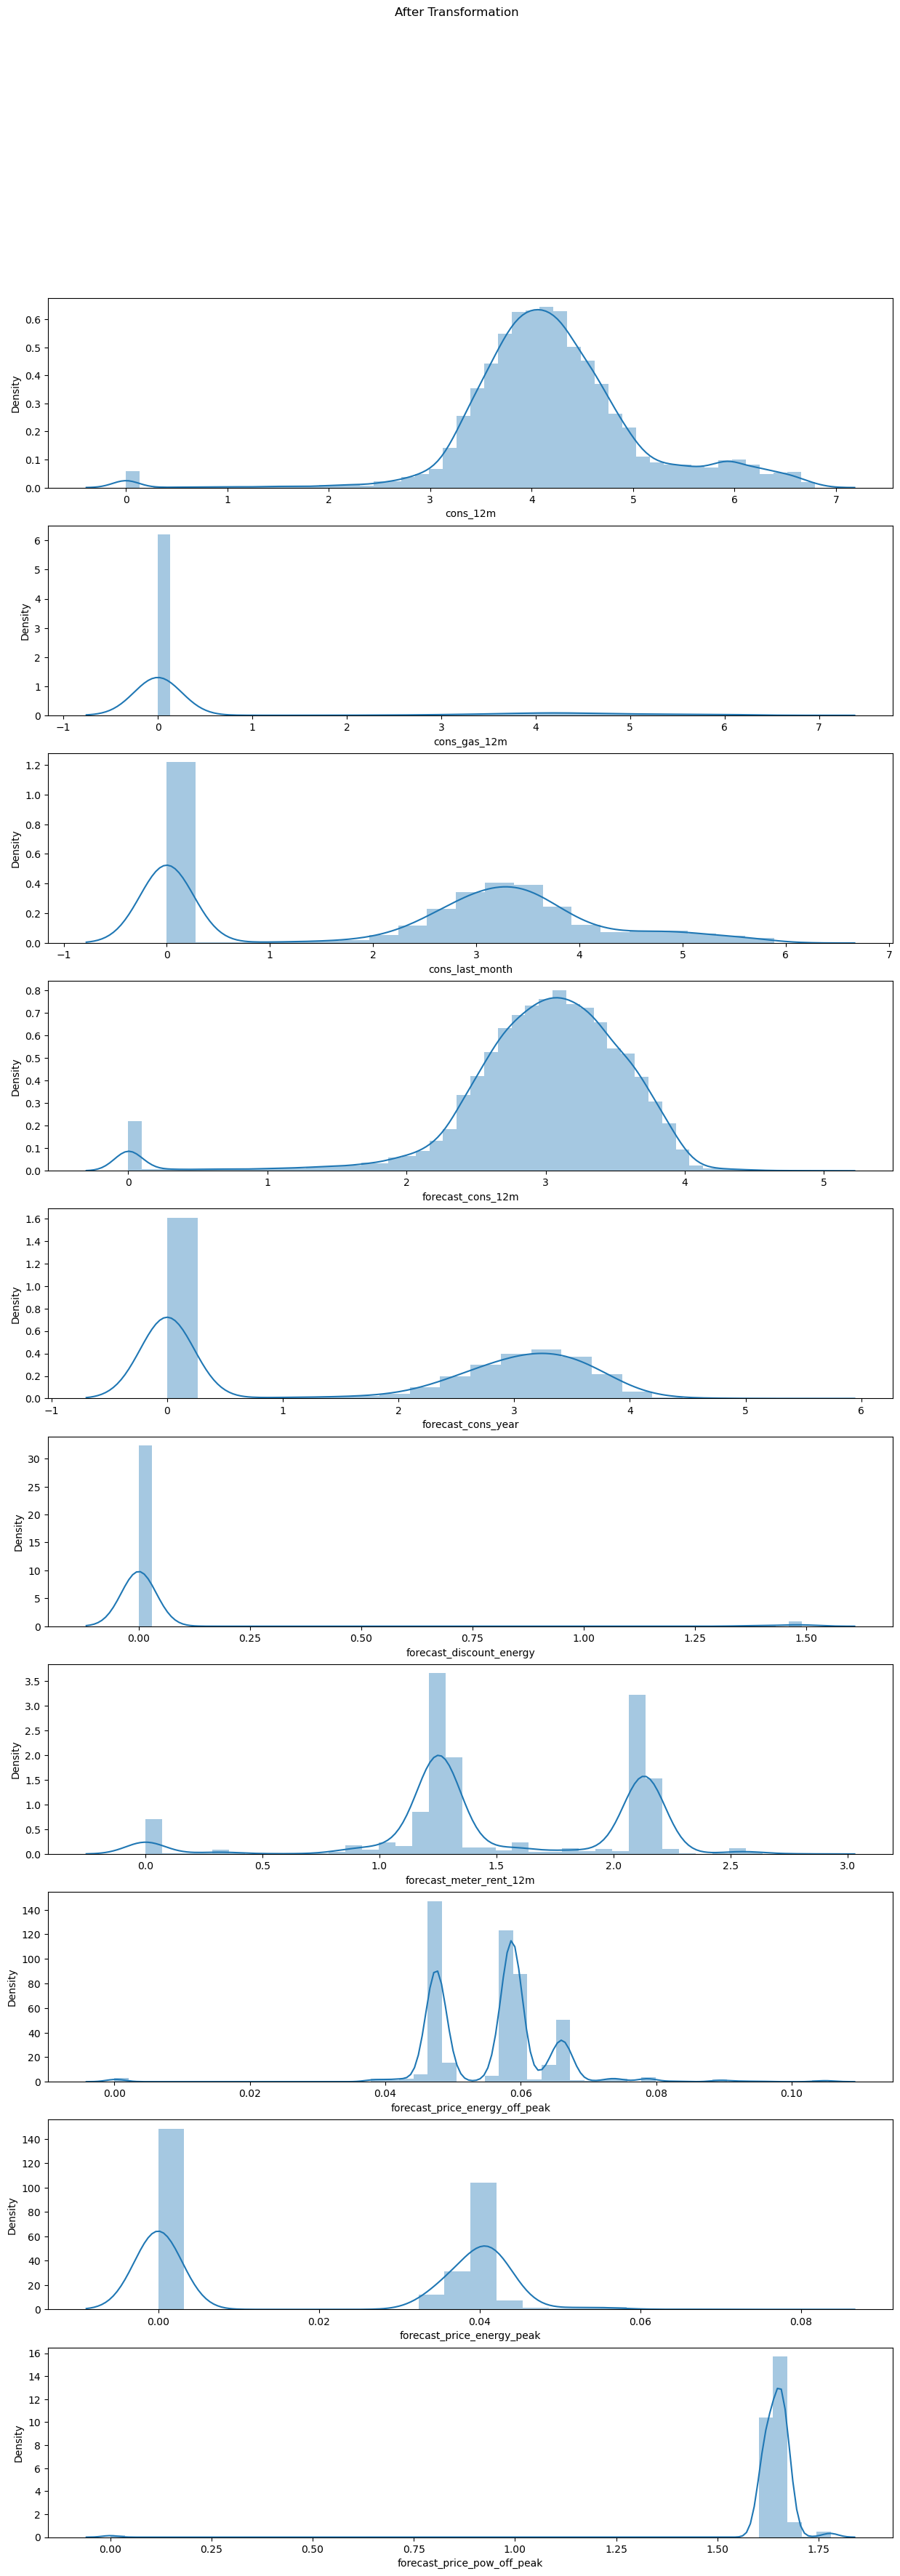

In [164]:
fig, axs = plt.subplots(nrows=10, figsize=(15, 40))

plt.suptitle('After Transformation')
for i, column in enumerate(numeric_columns):
    sns.distplot((df[column].dropna()), ax=axs[i])
    print(column,'\t',df[column].skew()) 

Now the features looks similar to normal distribution. Skewness is reduced alot in positive skewed features whereas skewness increased in negative skewed features. So, that is why log transformation cannot be applied on negative skewed data. To counter this problem we can add a large positive value to features having negative skew.

## 4. Modeling and evaluation

### Import packages

In [165]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Load Data

In [166]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,...,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.00000,4.73994,0.00000,0.00000,0.00000,0.44404,0.11448,0.09814,40.60670,1,0.00000,25.44000,25.44000,2,678.99000,43.64800,0.00006,0.00003,0.00044,1.10278,49.55070,22.02254,1.10285,49.55073,...,0.02404,0.03422,0.05826,18.59026,7.45067,26.04093,0.06055,0.08548,0.14603,44.26693,8.14578,44.26693,3,30,5,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.66848,0.00000,0.00000,2.28092,0.00000,1.23729,0.14571,0.00000,44.31138,0,0.00000,16.38000,16.38000,1,18.89000,13.80000,0.00000,0.00061,0.00000,0.00646,0.00000,0.00000,0.00647,0.00061,...,0.14249,0.00712,0.14961,44.31138,0.00000,44.31138,0.15137,0.08548,0.15137,44.44471,0.00000,44.44471,7,76,7,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.73640,0.00000,0.00000,1.68984,0.00000,1.59901,0.16579,0.08790,44.31138,0,0.00000,28.60000,28.60000,1,6.60000,13.85600,0.00001,0.00000,0.00000,0.00766,0.00000,0.00000,0.00767,0.00000,...,0.08209,0.08842,0.17051,44.38545,0.00000,44.38545,0.08459,0.08916,0.17247,44.44471,0.00000,44.44471,6,68,3,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.20003,0.00000,0.00000,2.38209,0.00000,1.31869,0.14669,0.00000,44.31138,0,0.00000,30.22000,30.22000,1,25.46000,13.20000,0.00001,0.00000,0.00000,0.00646,0.00000,0.00000,0.00647,0.00000,...,0.15121,0.00000,0.15121,44.40027,0.00000,44.40027,0.15313,0.00000,0.15313,44.44471,0.00000,44.44471,6,69,2,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.64601,0.00000,2.72181,2.65006,0.00000,2.12297,0.11690,0.10001,40.60670,0,1.72689,44.91000,44.91000,1,47.98000,19.80000,0.00001,0.00000,0.00000,0.00543,0.00195,0.00087,0.00544,0.00196,...,0.02054,0.03077,0.05131,16.27526,8.13763,24.41289,0.02222,0.03374,0.05587,16.29155,8.14578,24.43733,6,71,2,71,9,1,0,0,0,0,1,0,0


### Modelling

#### Data Sampling

In [167]:
# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


#### Model Training

In [ ]:
model = RandomForestClassifier(
    n_estimators = 10000,
    verbose = 1,
    max_depth = 15,
    min_samples_split = 2,
    n_jobs = 5,
    bootstrap = True
)
model.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    5.5s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    8.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:   12.3s
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:   16.7s
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:   21.7s
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:   27.5s
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed:   34.0s
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed:   40.8s
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed:   48.1s


Increased number of estimators and reduced the depth of the trees so that the trees can learn weak patterns within the data, and a lot of these weak learners together form a highly predictive pool of knowledge.

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import itertools

In [ ]:
y_pred = model.predict(X_test)

#### Accuracy

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The most obvious evaluation metric everyone think of is accuracy. Even though 90% accuracy seems like model is performing well on the data, it does not gives the whole picture.

#### Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Negative', 'Positive'], normalize=False)

In [ ]:
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Recall score is very low i.e. the model is not able to find the all positive sample correctly.

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Model is performing well on identifying negative samples but performing poorly on identifying positive samples. So, engineering better features and fine tuning of the model might improve the model performance.

In [ ]:
# Finding probabilites of churn
# proba_predictions = model.predict_proba(X_test)
# probabilities = proba_predictions[:, 1]

### Extracting feature importances from the model

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'])
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From the above graph, we can see that cons_12m, forecast_meter_rent_12m and net_margin are the most important features. In contrast to our previous hypothesis, price features are not the major drivers of the churn. Some of the price features has moderate effect and some has very little effect on churn. 

## 5. Insights & Recommendations

### Insights

Churn rate is nearly 10% which is relatively high.

Price Sensitivity is not a major factor which drives churn.

Power Consumption, meter rent and net margin are the main drivers

### Recommendations

Customers who are likely to leave use less services as they seek other options and contribute less to the client. Giving importance to loyal and engaged customers and providing discounts to them might help reduce churn.

Finally the conclusion that the hypothesis "Customers of PowerCo are more likely to churn (leave the service) if offered a lower price by a competitor, compared to customers who are not price sensitive." is not completely true. To arrive at certainity further experimentation is needed. 